<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/05_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the plot (Korean and English scores)
np.random.seed(42)
korean_scores = np.random.randint(0, 100, 100)
english_scores = korean_scores + np.random.normal(0, 10, 100)

# Create a DataFrame with the data
df = pd.DataFrame({
    'Korean Grade': korean_scores,
    'English Grade': english_scores
})

df

,Korean Grade,English Grade
0,51,37.533219
1,92,83.194087
2,14,2.694477
3,71,72.344289
4,60,65.821228
...,...,...
95,84,82.390626
96,79,75.117356
97,81,72.144876
98,52,48.432550


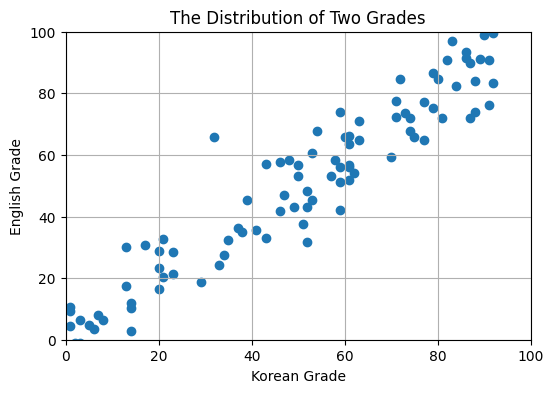

In [5]:
# Plot the data to match the uploaded image
plt.figure(figsize=(6, 4))
plt.scatter(df['Korean Grade'], df['English Grade'])
plt.title("The Distribution of Two Grades")
plt.xlabel("Korean Grade")
plt.ylabel("English Grade")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)

# Display the plot
plt.show()

In [2]:
# prompt: df의 주성분분석을 찾아줘

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 표준화 (평균 0, 표준편차 1)
x = df.values
x = StandardScaler().fit_transform(x)

# PCA 모델 생성 및 적용 (주성분 2개)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# 주성분을 DataFrame으로 변환
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# 설명된 분산 비율 출력
print('Explained variance ratio:', pca.explained_variance_ratio_)

# 주성분 DataFrame 출력
principalDf

Explained variance ratio: [0.97710448 0.02289552]


,principal component 1,principal component 2
0,-0.286368,-0.308587
1,1.745487,-0.257121
2,-1.974734,-0.209773
3,0.990798,0.002535
4,0.576325,0.119387
...,...,...
95,1.533949,-0.082242
96,1.247269,-0.127411
97,1.227760,-0.243525
98,-0.013571,-0.084092


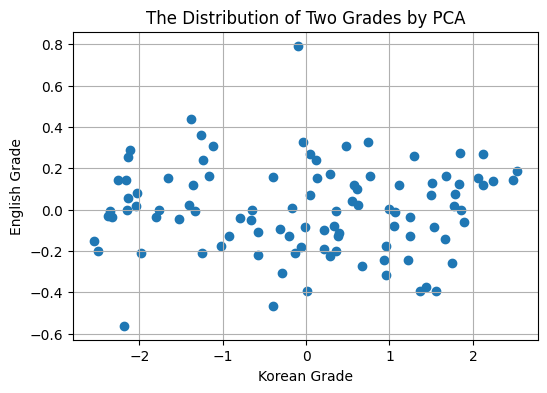

In [8]:
# Plot the data to match the uploaded image
plt.figure(figsize=(6, 4))
plt.scatter(principalDf['principal component 1'],
            principalDf['principal component 2'])
plt.title("The Distribution of Two Grades by PCA")
plt.xlabel("Korean Grade")
plt.ylabel("English Grade")
plt.grid(True)

# Display the plot
plt.show()

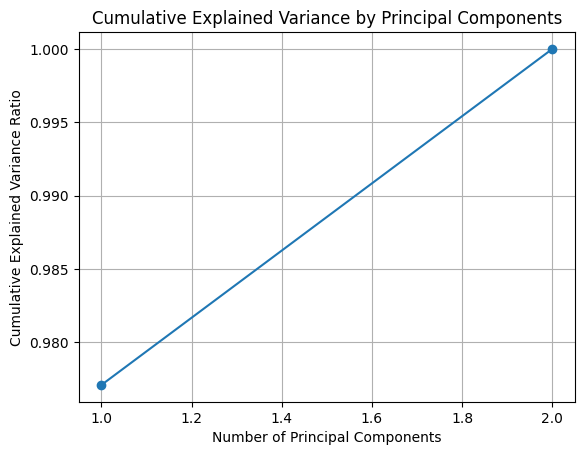

In [9]:
# prompt: 주성분분석에 따른 총분산의 비율을 시각화

import numpy as np
import matplotlib.pyplot as plt

# 설명된 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_

# 주성분 번호 (1부터 시작)
pc_numbers = np.arange(1, len(explained_variance_ratio) + 1)

# 누적 설명된 분산 비율 계산
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 시각화
plt.plot(pc_numbers, cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()


In [10]:
# prompt: Eigen value와 vector를 구해줘

import numpy as np
# 공분산 행렬 계산
covariance_matrix = np.cov(x.T)

# 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 결과 출력
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)


Eigenvalues: [1.97394844 0.04625358]
Eigenvectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


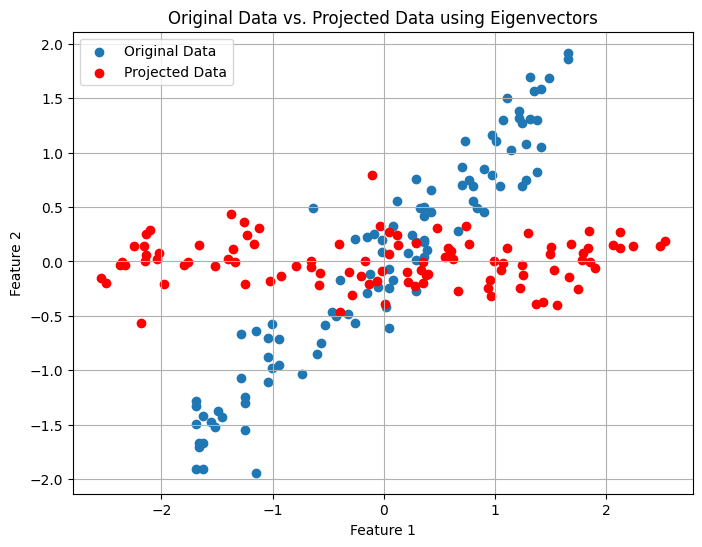

In [11]:
# prompt: Eigenvectors를 사용하여 2차원 평면에 원자료와 같이 시각화

import numpy as np
import matplotlib.pyplot as plt

# Eigenvectors를 사용하여 원본 데이터를 2차원으로 투영
projected_data = np.dot(x, eigenvectors[:, :2])

# 원본 데이터와 투영된 데이터를 시각화
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], label='Original Data')
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='red', label='Projected Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data vs. Projected Data using Eigenvectors')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
eigenvectors[:, :2]

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [13]:
print(f'행렬 x의 shape: {x.shape}, 행렬 Eigen Vector의 shape: {eigenvectors[:, :2].shape}')
print(f'원래자료를 투사한 행렬의 shape은 {projected_data.shape}')

행렬 x의 shape: (100, 2), 행렬 Eigen Vector의 shape: (2, 2)
원래자료를 투사한 행렬의 shape은 (100, 2)


# **Datascience Handbook 예시**
## **[principal-component-analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)**

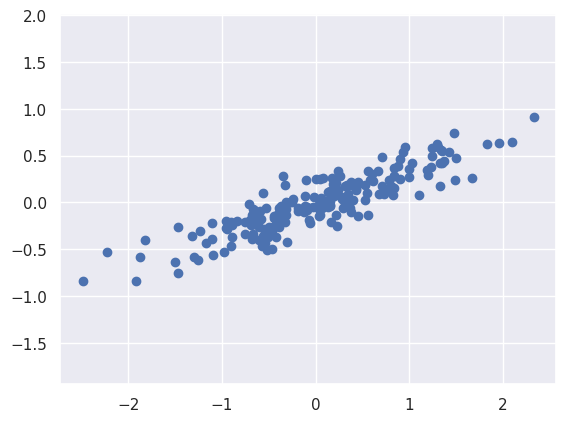

In [16]:
import seaborn as sns; sns.set()
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [18]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [19]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


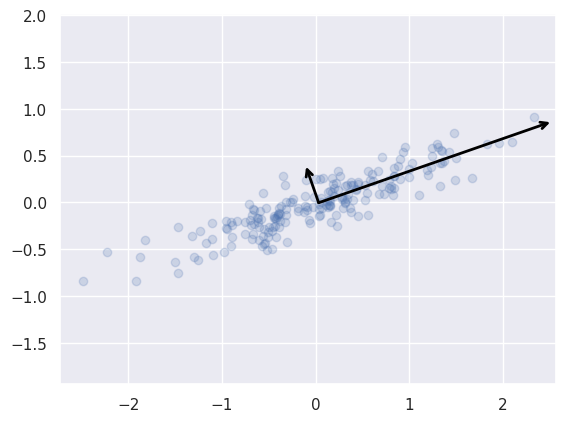

In [20]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,
                    color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [21]:
# prompt: X 의 eigen value와 Eigen vector

import numpy as np

# X의 공분산 행렬 계산
covariance_matrix_X = np.cov(X.T)

# X의 고유값과 고유벡터 계산
eigenvalues_X, eigenvectors_X = np.linalg.eig(covariance_matrix_X)

print("Eigenvalues of X:", eigenvalues_X)
print("Eigenvectors of X:", eigenvectors_X)


Eigenvalues of X: [0.7625315 0.0184779]
Eigenvectors of X: [[ 0.94446029 -0.32862557]
 [ 0.32862557  0.94446029]]


# <font color='red'> **Appendix**


# **$$ A \mathbf{v} = \lambda \mathbf{v} $$**
- https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors

In [22]:
# Importing numpy again since the environment was reset
import numpy as np

# Define matrix A
A = np.array([[2, 1], [1, 2]])

# Calculate eigenvalues and eigenvectors of A
eigenvalues, eigenvectors = np.linalg.eig(A)

# Take the first eigenvalue and eigenvector for comparison
lambda_1 = eigenvalues[0]
v_1 = eigenvectors[:, 0]

# Calculate A * v and lambda * v
A_v = np.dot(A, v_1)
lambda_v = lambda_1 * v_1

# Compare the two results
A_v, lambda_v


(array([2.12132034, 2.12132034]), array([2.12132034, 2.12132034]))

### **X 원자료의 표준공분산을 구한 후(정방형행렬) Eigen value, vectors를 구한다**

In [23]:
# prompt: X의 표준공분산 행렬

import numpy as np
# X의 표준화된 데이터 계산
X_scaled = StandardScaler().fit_transform(X)

# 표준화된 데이터의 공분산 행렬 계산
covariance_matrix_X_scaled = np.cov(X_scaled.T)

print("표준화된 X의 공분산 행렬:\n", covariance_matrix_X_scaled)


표준화된 X의 공분산 행렬:
 [[1.00502513 0.89385925]
 [0.89385925 1.00502513]]


In [24]:
# Define matrix A
A = covariance_matrix_X_scaled

# Calculate eigenvalues and eigenvectors of A
eigenvalues, eigenvectors = np.linalg.eig(A)

# Take the first eigenvalue and eigenvector for comparison
lambda_1 = eigenvalues[0]
v_1 = eigenvectors[:, 0]

# Calculate A * v and lambda * v
A_v = np.dot(A, v_1)
lambda_v = lambda_1 * v_1

# Compare the two results
A_v, lambda_v

(array([-0.07860614,  0.07860614]), array([-0.07860614,  0.07860614]))